# Import modul dan dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df = pd.read_csv('../input/titanic/train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature engineering 1: buat kolom FamilySize

In [3]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['Name','SibSp', 'Parch', 'FamilySize']]

,Name,SibSp,Parch,FamilySize
0,"Braund, Mr. Owen Harris",1,0,2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,2
2,"Heikkinen, Miss. Laina",0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,2
4,"Allen, Mr. William Henry",0,0,1
...,...,...,...,...
886,"Montvila, Rev. Juozas",0,0,1
887,"Graham, Miss. Margaret Edith",0,0,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,4
889,"Behr, Mr. Karl Howell",0,0,1


# Feature engineering 2: Convert kolom Embarked jadi one-hot

In [4]:
print("Sebelum drop :", df.shape)
df = df.dropna(subset=['Embarked'])
print("Setelah drop :", df.shape)

Sebelum drop : (891, 13)
Setelah drop : (889, 13)


In [5]:
embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_one_hot], axis=1)

In [6]:
df[['Name', 'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head()

,Name,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,"Braund, Mr. Owen Harris",S,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,1,0,0
2,"Heikkinen, Miss. Laina",S,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,0,0,1
4,"Allen, Mr. William Henry",S,0,0,1


In [7]:
# Hapus kolom embarked yang aslinya
df = df.drop('Embarked', axis=1)

# Feature engineering 3: Ambil huruf pertama dari kolom Cabin

In [8]:
df['Cabin'] = df['Cabin'].fillna('U')
df[['Name', 'Cabin']].head()

,Name,Cabin
0,"Braund, Mr. Owen Harris",U
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85
2,"Heikkinen, Miss. Laina",U
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123
4,"Allen, Mr. William Henry",U


In [9]:
def take_initial(x):
    return x[0]

df['Cabin'] = df['Cabin'].apply(take_initial)
df[['Name', 'Cabin']].head()

,Name,Cabin
0,"Braund, Mr. Owen Harris",U
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,"Heikkinen, Miss. Laina",U
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C
4,"Allen, Mr. William Henry",U


In [10]:
cabin_one_hot = pd.get_dummies(df['Cabin'], prefix='Cabin')
df = pd.concat([df, cabin_one_hot], axis=1)

# Hapus kolom cabin yang aslinya
df = df.drop('Cabin', axis=1)

# Tampilkan nama tiap kolom
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U'],
      dtype='object')

# Feature engineering 4: Ambil gelar dari nama

In [11]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [12]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

df['Title'] = df['Name'].apply(get_title)

In [13]:
df['Title'].head(7)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
5      Mr
6      Mr
Name: Title, dtype: object

In [14]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [15]:
title_one_hot = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, title_one_hot], axis=1)

# Tampilkan semua kolom di data frame
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Title', 'Title_Capt',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

In [16]:
df = df.drop('Name', axis=1)

# Feature engineering 5: Convert jenis kelamin jadi one-hot

In [17]:
sex_one_hot = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, sex_one_hot], axis=1)

# Hapus kolom sex yang aslinya
df = df.drop('Sex', axis=1)

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Title', 'Title_Capt', 'Title_Col',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'Sex_female', 'Sex_male'],
      dtype='object')

# Feature engineering 6: Mengisi NaN value di kolom Age

In [18]:
age_median = df.groupby('Title')['Age'].median()
age_median

Title
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [19]:
def fill_age(x):
    for index, age in zip(age_median.index, age_median.values):
        if x['Title'] == index:
            return age

df['Age'] = df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

# Feature engineering 7: Preprocessing dikit lagi

In [20]:
df.dtypes

PassengerId             int64
Survived                int64
Pclass                  int64
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
FamilySize              int64
Embarked_C              uint8
Embarked_Q              uint8
Embarked_S              uint8
Cabin_A                 uint8
Cabin_B                 uint8
Cabin_C                 uint8
Cabin_D                 uint8
Cabin_E                 uint8
Cabin_F                 uint8
Cabin_G                 uint8
Cabin_T                 uint8
Cabin_U                 uint8
Title                  object
Title_Capt              uint8
Title_Col               uint8
Title_Don               uint8
Title_Dr                uint8
Title_Jonkheer          uint8
Title_Lady              uint8
Title_Major             uint8
Title_Master            uint8
Title_Miss              uint8
Title_Mlle              uint8
Title_Mme               uint8
Title_Mr  

In [21]:
df = df.drop(['PassengerId', 'Ticket', 'Title'], axis=1)

In [22]:
df.dtypes

Survived                int64
Pclass                  int64
Age                   float64
SibSp                   int64
Parch                   int64
Fare                  float64
FamilySize              int64
Embarked_C              uint8
Embarked_Q              uint8
Embarked_S              uint8
Cabin_A                 uint8
Cabin_B                 uint8
Cabin_C                 uint8
Cabin_D                 uint8
Cabin_E                 uint8
Cabin_F                 uint8
Cabin_G                 uint8
Cabin_T                 uint8
Cabin_U                 uint8
Title_Capt              uint8
Title_Col               uint8
Title_Don               uint8
Title_Dr                uint8
Title_Jonkheer          uint8
Title_Lady              uint8
Title_Major             uint8
Title_Master            uint8
Title_Miss              uint8
Title_Mlle              uint8
Title_Mme               uint8
Title_Mr                uint8
Title_Mrs               uint8
Title_Ms                uint8
Title_Rev 

In [23]:
y = df['Survived'].values
X = df.iloc[:,1:].values

# Machine learning: logistic regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)

print('X_train.shape\t:', X_train.shape)
print('y_train.shape\t:', y_train.shape)
print('X_test.shape\t:', X_test.shape)
print('y_test.shape\t:', y_test.shape)

X_train.shape	: (711, 37)
y_train.shape	: (711,)
X_test.shape	: (178, 37)
y_test.shape	: (178,)


In [25]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [26]:
print('Train accuracy\t:', clf.score(X_train, y_train))
print('Test accuracy\t:', clf.score(X_test, y_test))

Train accuracy	: 0.8396624472573839
Test accuracy	: 0.8426966292134831


# Model evaluation

In [27]:
test_preds = clf.predict(X_test)
test_preds

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0])

In [28]:
y_test

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0])

In [29]:
cm = confusion_matrix(y_test, test_preds)
cm

array([[111,  15],
       [ 13,  39]])

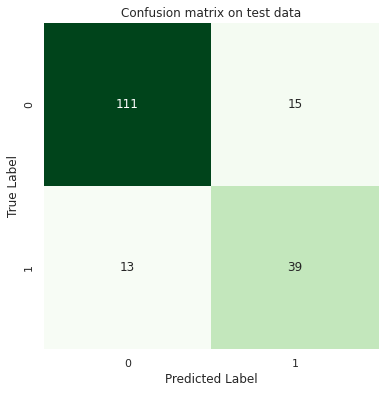

In [30]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()